# DTSC670: Foundations of Machine Learning Models

## Assignment 7: Polynomial Regression I

#### Name:

### CodeGrade
Please note that this assignment will be manually graded.  **You will have one attempt at submitting this assignment.**

Since we are merely using CodeGrade for this assignment as a platform to manually grade assignments, CodeGrade will not  execute your code for this assignment. Rather, it simply renders your Jupyter Notebook in the web browser. Therefore, any code blocks that generate output must be fully executed within the notebook prior to submission. Otherwise, we will not see the output of your code!

### Details
The purpose of this assignment is expose you to a polynomial regression problem. Your goal is to:

1. Create the following figure using matplotlib, which plots the data from the file called `PolynomialRegressionData_I.csv`.  This figure is generated using the same code that you developed in Assignment 3 of Module 2 - you should reuse that same code.
2. Perform a PolynomialFeatures transformation, then perform linear regression to calculate the optimal ordinary least squares regression model parameters.
3. Recreate the first figure by adding the best fit curve to all subplots.
4. Infer the true model parameters.

Below is the first figure you must emulate:

<img src="PolynomialDataPlot_I.png" width ="800" />

Below is the second figure you must emulate:

<img src="PolynomialDataPlot_II.png" width ="800" />

Each of the two figures has four subplots.  Note the various viewing angles that each subplot presents - you can achieve this with the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) method. Use the same color scheme for the datapoints shown here, which is called `jet`.  Be sure to label your axes as shown.

In [177]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
import os
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Import Data

Begin by importing the data from the file called `PolynomialRegressionData_I.csv`.

In [178]:
import pandas as pd

poly = pd.read_csv("PolynomialRegressionData_I.csv") #importing data
poly

,x,y,z
0,-3.319120,-2.070820,-960.075064
1,8.812980,8.055306,109.527857
2,-19.995425,-19.407131,4867.408412
3,-7.906697,-7.559838,-149.039706
4,-14.129764,-12.762732,1493.048153
5,-16.306456,-15.632740,2781.083859
6,-12.549592,-13.841154,1963.427437
7,-6.177571,-7.025815,-258.953869
8,-4.129301,-4.295901,-738.530511
9,1.552669,2.469865,-890.068762


# Create First Image 

Use the [scatter3D](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) to plot in three dimensions.  Create four [subplots](https://matplotlib.org/3.1.0/gallery/recipes/create_subplots.html) with the appropriate viewing angles using the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) function.

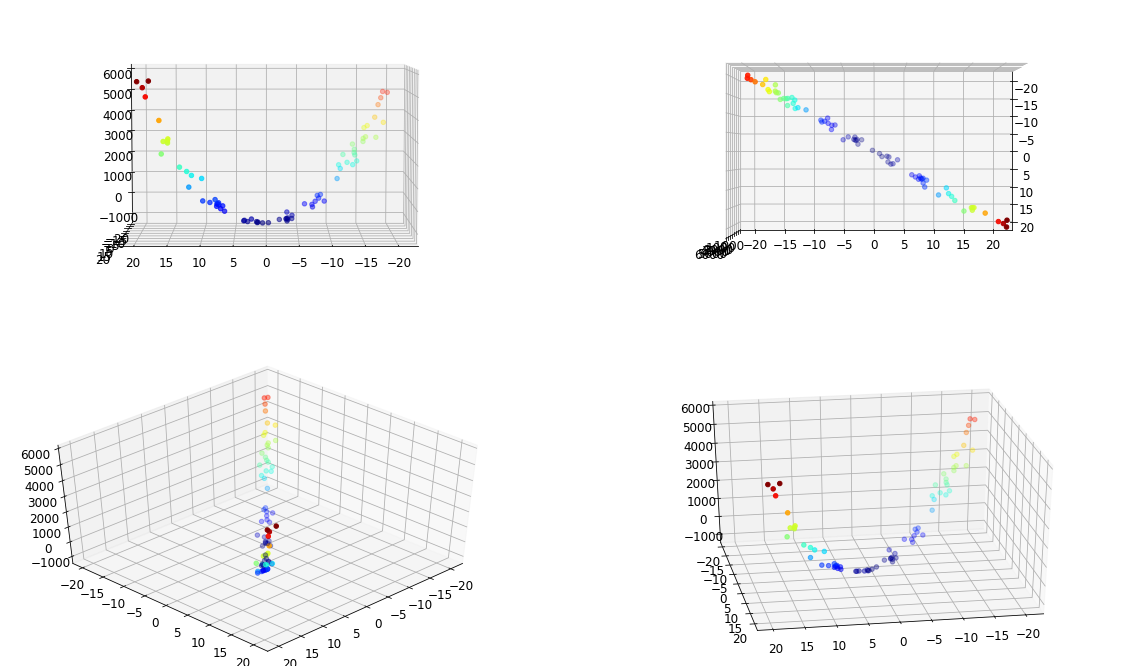

In [179]:
from mpl_toolkits.mplot3d import Axes3D

#saving each column to their own variable to make easier to visualize
first = poly['x']
second = poly['y']
third = poly['z']

fig = plt.figure(figsize=[20, 12]) #creating figure and setting size

#creating all four subplots via the add_subplot function
ax = fig.add_subplot(2, 2, 1, projection='3d') #projection 3d makes the figure 3 dimensional. I also specify how many subplots and which one each subplot is here.
ax.view_init(5, 90) #I played around with this until I got the desired angle
ax.scatter3D(first, second, third, c=third, cmap = 'jet')

#repeat three more times.
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.view_init(90, 0)
ax2.scatter3D(first, second, third, c=third, cmap = 'jet')

ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax3.view_init(45, 45)
ax3.scatter3D(first, second, third, c=third, cmap = 'jet')

ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.view_init(30, 80)
ax4.scatter3D(first, second, third, c=third, cmap = 'jet')

# Perform Polynomial Features Transformation

Perform a polynomial transformation on your features.

In [180]:
from sklearn.preprocessing import PolynomialFeatures

features = poly[['x', 'y']] #assigning x and y columns to features variable

response = poly[['z']] #assigning z column to response variable

features2 = PolynomialFeatures(degree=2, include_bias = False) #instantuating PolynomialFeatures as features2
first_poly = features2.fit_transform(features) #doing fit_transform on my features columns
first_poly

array([[-3.31911981e+00, -2.07082002e+00,  1.10165563e+01,
         6.87329977e+00,  4.28829557e+00],
       [ 8.81297974e+00,  8.05530560e+00,  7.76686119e+01,
         7.09912450e+01,  6.48879482e+01],
       [-1.99954250e+01, -1.94071308e+01,  3.99817021e+02,
         3.88053829e+02,  3.76636728e+02],
       [-7.90669709e+00, -7.55983776e+00,  6.25158589e+01,
         5.97733473e+01,  5.71511470e+01],
       [-1.41297644e+01, -1.27627317e+01,  1.99650241e+02,
         1.80334391e+02,  1.62887320e+02],
       [-1.63064562e+01, -1.56327401e+01,  2.65900514e+02,
         2.54914592e+02,  2.44382564e+02],
       [-1.25495915e+01, -1.38411542e+01,  1.57492248e+02,
         1.73700832e+02,  1.91577551e+02],
       [-6.17757092e+00, -7.02581483e+00,  3.81623825e+01,
         4.34024694e+01,  4.93620741e+01],
       [-4.12930103e+00, -4.29590060e+00,  1.70511270e+01,
         1.77390668e+01,  1.84547620e+01],
       [ 1.55266936e+00,  2.46986538e+00,  2.41078214e+00,
         3.83488430e+00

# Train Linear Regression Model

From the `sklearn.linear_model` library, import the `LinearRegression` class.  Instantiate an object of this class called `model`, and fit it to the data. `x` and `y` will be your training data and `z` will be your response. Print the optimal model parameters to the screen by completing the following `print()` statements.

In [181]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() #creating linear regression model
model.fit(first_poly, response) #fitting linear regression model on my transfromed features data and response data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [182]:
print("Computed Model Coefficients: ", model.coef_)
print("Computed Model Intercept : ", model.intercept_)

Computed Model Coefficients:  [[ 8.09457649 -0.09962593 -0.05144212  0.10558512 15.94863437]]
Computed Model Intercept :  [-1000.13811493]


# Create Second Image

Use the following `x_fit` and `y_fit` data to compute `z_fit` by invoking the model's `predict()` method.  This will allow you to plot the line of best fit that is predicted by the model.

In [183]:
# Plot Curve Fit
x_fit = np.linspace(-21,21,1000)
y_fit = x_fit

data = pd.DataFrame({'x data': x_fit, 'y data': y_fit}) #creating a dataframe out of x_fit and y_fit

features3 = PolynomialFeatures(degree=2, include_bias = False) #performing polynomial transformation on x_fit and y_fit as we did above
second_poly = features3.fit_transform(data)

z_fit =  model.predict(second_poly) #this took me a couple of days but I am so glad it worked. closely following the instructions from the walkthrough helped me with this.
z_fit

array([[ 5.88919275e+03],
       [ 5.86130000e+03],
       [ 5.83346382e+03],
       [ 5.80568422e+03],
       [ 5.77796118e+03],
       [ 5.75029472e+03],
       [ 5.72268483e+03],
       [ 5.69513151e+03],
       [ 5.66763475e+03],
       [ 5.64019457e+03],
       [ 5.61281097e+03],
       [ 5.58548393e+03],
       [ 5.55821346e+03],
       [ 5.53099956e+03],
       [ 5.50384224e+03],
       [ 5.47674148e+03],
       [ 5.44969730e+03],
       [ 5.42270969e+03],
       [ 5.39577865e+03],
       [ 5.36890417e+03],
       [ 5.34208627e+03],
       [ 5.31532494e+03],
       [ 5.28862019e+03],
       [ 5.26197200e+03],
       [ 5.23538038e+03],
       [ 5.20884534e+03],
       [ 5.18236686e+03],
       [ 5.15594496e+03],
       [ 5.12957962e+03],
       [ 5.10327086e+03],
       [ 5.07701867e+03],
       [ 5.05082305e+03],
       [ 5.02468400e+03],
       [ 4.99860152e+03],
       [ 4.97257561e+03],
       [ 4.94660628e+03],
       [ 4.92069351e+03],
       [ 4.89483732e+03],
       [ 4.8

Recreate the first image, but plot the line of best fit in each of the subplots as well.

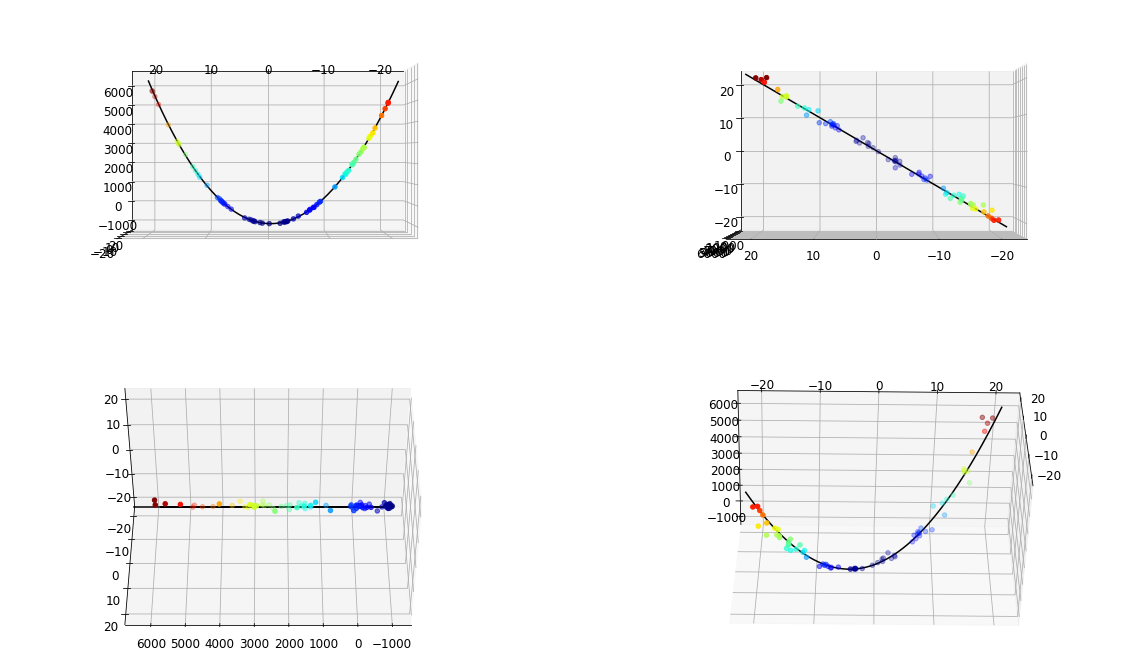

In [184]:
from mpl_toolkits import mplot3d
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

first = poly['x']
second = poly['y']
third = poly['z']

fig = plt.figure(figsize=[20, 12]) #creating figure and setting size

#creating all four subplots via the add_subplot function
ax = fig.add_subplot(2, 2, 1, projection='3d') #projection 3d makes the figure 3 dimensional. I also specify how many subplots and which one each subplot is here.
ax.view_init(-90, 90) #I played around with this until I got the desired angle
ax.scatter3D(second, third, first, c=third, cmap = 'jet')
ax.plot3D(y_fit, z_fit, x_fit, "black") #doesn't like z_fit in last position which makes finding the angle very difficult.

#repeat three more times.
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.view_init(0, 90)
ax2.scatter3D(first, third, second, c=third, cmap = 'jet')
ax2.plot3D(x_fit, z_fit, y_fit, "black")

ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax3.view_init(45, 90)#getting the correct angel is very difficult since I had to change the order of fx, y, z to get the regression line to fit
ax3.scatter3D(third, first, second, c=third, cmap = 'jet')
ax3.plot3D(z_fit, x_fit, y_fit, "black")

ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.view_init(-55, -1)#This is really as close as close as I can get it. I played with this for hours and can't get it to look exactly correct.
ax4.scatter3D(third, first, second, c=third, cmap = 'jet')
ax4.plot3D(z_fit, x_fit, y_fit, "black")

# Infer the True Model Parameters

Provided that the true model parameters are **integer values**, you are able to infer the true model parameters by rounding the coefficients and the intercept to the nearest integer value.  You may "hard-code" these values into the below print statements. (See the assignment 3 template for more information)

Use the `get_feature_names()` (this has been deprecated -- depending on your version of sklearn, you may need to use `get_feature_names_out()`) method of the `PolynomialFeatures` class to be certain of which coefficients you calculated!  You need to report your final answers in a format that is ___abundantly clear___ to me which which coefficient corresponds to which dependent variable of the model!  You may add more `print()` statements to accomplish this if you must.

In [185]:
print("True Model Coefficients: ", model.coef_.round()) #rounding model coefficients like Assignment three
print("True Model Intercept : ", model.intercept_.round()) #rounding model coefficiens like Assignment three

True Model Coefficients:  [[ 8. -0. -0.  0. 16.]]
True Model Intercept :  [-1000.]


In [186]:
from sklearn.preprocessing import OneHotEncoder #did lots of research on get_feature_names(). 
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
#Learned that in order to call get_feature_names, you need to OnehotEncode data and do a column transformation as well as a fit before passing to get_feature_names.

ohe = OneHotEncoder(categories='auto', sparse=False)
imp = SimpleImputer()

#transforming columns x and y
ct = make_column_transformer(
    (ohe, ['x', 'y']))

In [187]:
ct.fit_transform(poly).shape

(75, 150)

In [188]:
ct.get_feature_names() ##I'm not sure if this was what you were looking for but I did my best. There doesn't seem to be much out there on get_feature_names

['onehotencoder__x0_-19.995425007306203',
 'onehotencoder__x0_-19.26846890623233',
 'onehotencoder__x0_-19.22532168518812',
 'onehotencoder__x0_-18.904496272082948',
 'onehotencoder__x0_-18.437808670684703',
 'onehotencoder__x0_-18.001861642156513',
 'onehotencoder__x0_-17.865498195316786',
 'onehotencoder__x0_-16.598231545208886',
 'onehotencoder__x0_-16.30645620924809',
 'onehotencoder__x0_-16.066126646677994',
 'onehotencoder__x0_-15.906622846886965',
 'onehotencoder__x0_-15.87095973689432',
 'onehotencoder__x0_-14.798857115268893',
 'onehotencoder__x0_-14.5010118341505',
 'onehotencoder__x0_-14.428946109969658',
 'onehotencoder__x0_-14.384522456190648',
 'onehotencoder__x0_-14.130857003767595',
 'onehotencoder__x0_-14.129764367315474',
 'onehotencoder__x0_-13.206783217417245',
 'onehotencoder__x0_-12.549591544893165',
 'onehotencoder__x0_-12.075940436604851',
 'onehotencoder__x0_-11.821910010739302',
 'onehotencoder__x0_-11.534875359997637',
 'onehotencoder__x0_-9.378133625110953',